In [29]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [30]:
import tensorflow as tf

In [31]:
cifar10 = tf.keras.datasets.cifar10.load_data

(x_train, y_train), (x_test, y_test) = cifar10()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [32]:
print(type(x_train), x_train.shape)
print(np.min(x_train), np.max(x_train))

<class 'numpy.ndarray'> (50000, 32, 32, 3)
0.0 1.0


In [33]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

frog


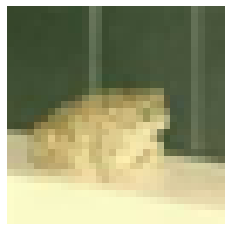

In [34]:
i = 350
imshow(x_train[i])
axis('off')
print(labels[y_train[i, 0]])



---



## Task 1
Build a neural network with two *dense* layers and an output layer. The first dense layer should have 512 neurons and the second 128 neurons. Both layers should use *relu* activation function. After each of these *Dense* layers, you should have a *dropout* layer (tf.keras.Layers.Dropout) with dropout probability 0.2. The output layer
should be a *dense* layer with *softmax* activation.

Compile the model with *sparse_categorical_crossentropy* loss and *adam* optimizer. The model should have *accuracy* in its metrics. 

After create the model object, print out the model summary.

In [35]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(32,32,3)))
model.add(layers.Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 1,640,330
Trainable params: 1,640,330
Non-trainable params: 0
____________________________________________

## Task 2
Train the model for 50 epochs. Evaluate the model on the testing data. Print out the model accuracy on test data after the training.

In [36]:
model.fit(x_train,y_train, batch_size=200, epochs=50)
tcloss,tacc = model.evaluate(x_test, y_test, verbose=2)
print('Accuracy on test data is:', tacc)


Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 2.2975 - accuracy: 0.1900
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1.8600 - accuracy: 0.3242
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1.7744 - accuracy: 0.3635
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1.7302 - accuracy: 0.3756
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1.7017 - accuracy: 0.3877
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1.6709 - accuracy: 0.3991
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1.6462 - accuracy: 0.4080
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1.6216 - accuracy: 0.4195
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1.6103 - accuracy: 0.4207
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1.6049 - accuracy: 0.4214

## Task 3
Implement a function *recognize*. It takes an image (shape = 32, 32, 3) as an input and use the "model" you trained above to make a prediction of the image's label. Your function should return the predicted (string) label (use the labels list to map numeric prediction to string label). 

Neural network recognizes this image as: frog
true image label: frog


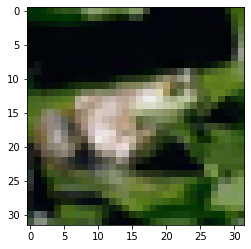

In [37]:
def recognize(new_img):
    pred = model.predict(new_img[None, :, :, :])[0]
    return labels[np.argmax(pred)]

    
i = 62
new_img = x_test[i]
pred = recognize(new_img)

print('Neural network recognizes this image as:', pred)
print('true image label:', labels[y_test[i, 0]])
imshow(new_img)